In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib

In [4]:
%matplotlib inline

In [5]:
matplotlib.rcParams["font.size"] = 16

In [8]:
# if we invested $1000 in 1970, how would it have turned out?
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


In [20]:
starting = 1000
df["mult"] = df["return"].cumprod()
df["wealth"] = starting * df["mult"]
df = df.set_index("year")
df.head()

,return,mult,wealth
year,,,
1970,1.0401,1.040100,1040.100000
1971,1.1431,1.188938,1188.938310
1972,1.1898,1.414599,1414.598801
1973,0.8534,1.207219,1207.218617
1974,0.7353,0.887668,887.667849


Text(0, 0.5, 'Wealth ($)')

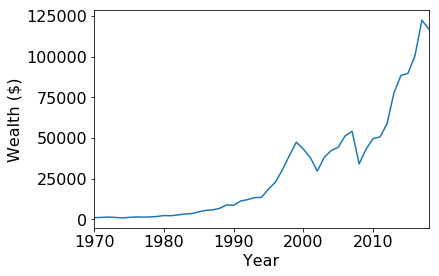

In [21]:
ax = df["wealth"].plot.line()
ax.set_xlabel("Year")
ax.set_ylabel("Wealth ($)")

In [22]:
# how risky is investing in the S&P 500?
# approach: do many simulations
# in each sim, randomly choose historical years to replay

In [23]:
import random

In [33]:
random.choices([1, 2, 10], k=10)

[1, 1, 10, 1, 1, 1, 2, 2, 1, 1]

In [77]:
# Series for one outcome
def run_sim(starting=1000, years=10):
    rand_returns = random.choices(list(df["return"]), k=years)
    rand_returns = Series(rand_returns)
    return rand_returns.cumprod() * starting

# DataFrame with many outcomes, each in a column
def run_mult_sims(sims=10):
    sims_df = DataFrame()
    for i in range(sims):
        sims_df["sim"+str(i)] = run_sim()
    return sims_df
    
sims = run_mult_sims(250)
#sims.plot.line(legend=False) # detective: what usually happens

In [78]:
sims.head()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
0,1215.500000,955.700000,630.000000,1119.600000,1189.800000,735.300000,1184.400000,881.100000,1062.700000,1150.600000,...,1166.100000,1323.900000,1021.100000,1076.200000,1100.800000,1333.600000,1040.100000,1100.800000,1325.000000,950.800000
1,893.757150,887.080740,729.477000,1296.384840,874.859940,764.785530,746.172000,776.337210,1417.216720,1410.175360,...,1604.320380,1622.571840,1160.888590,1308.121100,1436.213760,1038.874400,1212.860610,1416.509440,1603.780000,864.277200
2,1058.565968,1168.196627,775.215208,1717.709913,1072.228342,481.814884,756.469174,827.264931,1755.081186,1880.609860,...,2113.371237,1550.691907,1529.238540,1267.569346,1580.984107,1277.399962,1439.301686,1736.073970,1624.949896,1145.167290
3,1338.662524,1386.298937,919.947887,1664.460906,1297.825186,638.404721,877.504241,1079.332555,1841.255672,2138.065350,...,2224.323226,1795.546160,1783.245061,1739.105143,1663.985773,1460.195897,1852.093409,1760.031790,2153.058612,1395.157309
4,1356.332869,1462.406748,1127.488131,2014.663480,1325.209297,840.715177,1069.063417,1188.129277,2243.201786,2647.780129,...,2593.783314,2377.123561,1895.054526,2386.052256,2104.276408,1795.456875,1891.172580,1797.168461,2317.121678,1190.627248


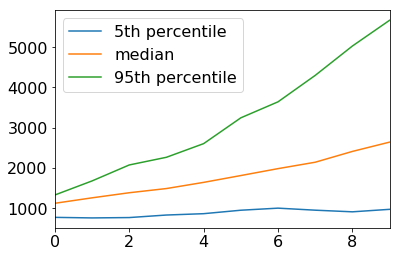

In [79]:
# for percentile, use .quantile
DataFrame({
    "5th percentile": sims.quantile(0.05, axis=1),
    "median": sims.quantile(0.5, axis=1),
    "95th percentile": sims.quantile(0.95, axis=1),
}).plot.line()

In [81]:
df = pd.read_csv("Fire_Hydrants.csv")
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

In [82]:
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [106]:
colors = df["nozzle_color"]
colors = colors.str.upper()
colors.head(2)

0    BLUE
1    BLUE
Name: nozzle_color, dtype: object

In [108]:
counts = colors.value_counts() # like GROUP BY and COUNT(*) in SQL
counts.head(3)

BLUE      7003
GREEN      330
ORANGE      79
Name: nozzle_color, dtype: int64

Text(0, 0.5, '# of Hydrants')

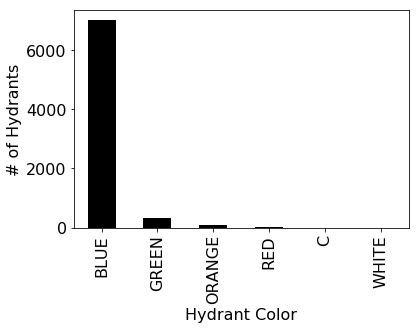

In [105]:
ax = counts.plot.bar(color="k")
ax.set_xlabel("Hydrant Color")
ax.set_ylabel("# of Hydrants")

In [116]:
counts = df["Style"].str.upper().value_counts()
top12 = counts.iloc[:12]
top12["other"] = counts.iloc[12:].sum()
top12

PACER             3620
M-3               1251
MUELLER           1243
WB-59              664
K-11               351
K-81               162
W-59               151
CLOW 2500          123
CLOW MEDALLION      70
CLOW                50
CENTURIAN           35
EDDY                27
other              167
Name: Style, dtype: int64

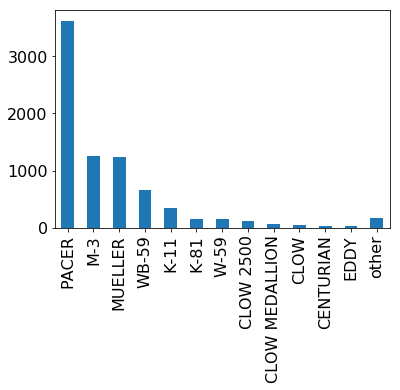

In [117]:
top12.plot.bar()

In [118]:
# when were all the pacers installed?